# **Project 3**, APS1070 Winter 2022
#### **PCA [10 marks]**
**Deadline: July 23rd, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Hongjian Zhu
*   **Student number**: 1004291857



In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [1 Mark]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot) so you can easily compare them).
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of Covid cases negative?) What does the sign of values indicate? **[0.25]**

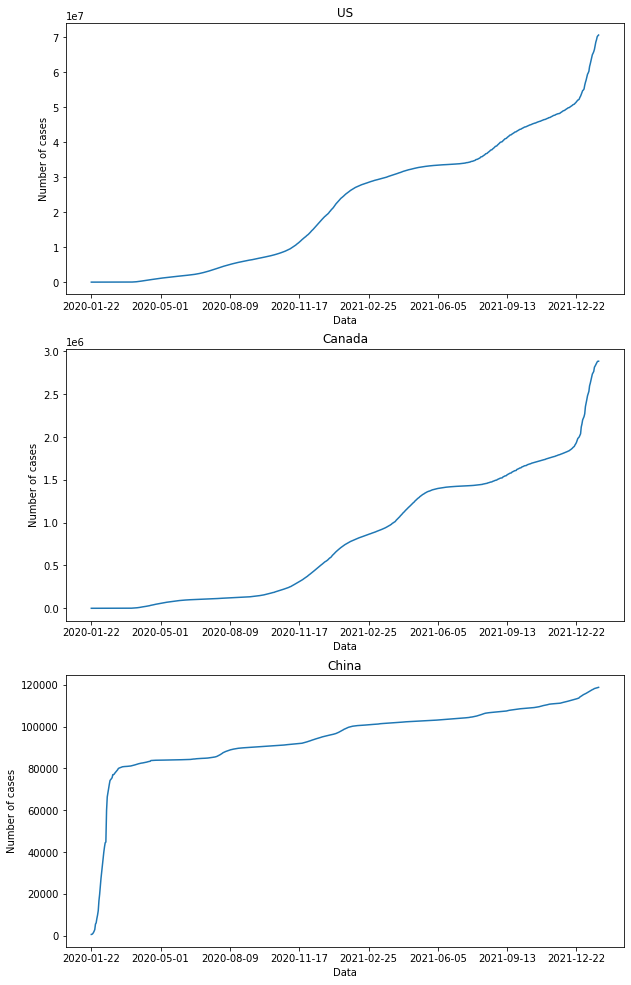

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Part 1.1
Countries = ['US', 'Canada', 'China']
Data = []
plt.figure(figsize=(10, 17))
for ix, info in enumerate(Countries):
  temp_data = cases_raw.loc[info]
  Data.append(temp_data)
  plt.subplot(3,1,ix+1)
  temp_data.plot()
  plt.ylabel('Number of cases')
  plt.xlabel('Data')
  plt.title(Countries[ix])

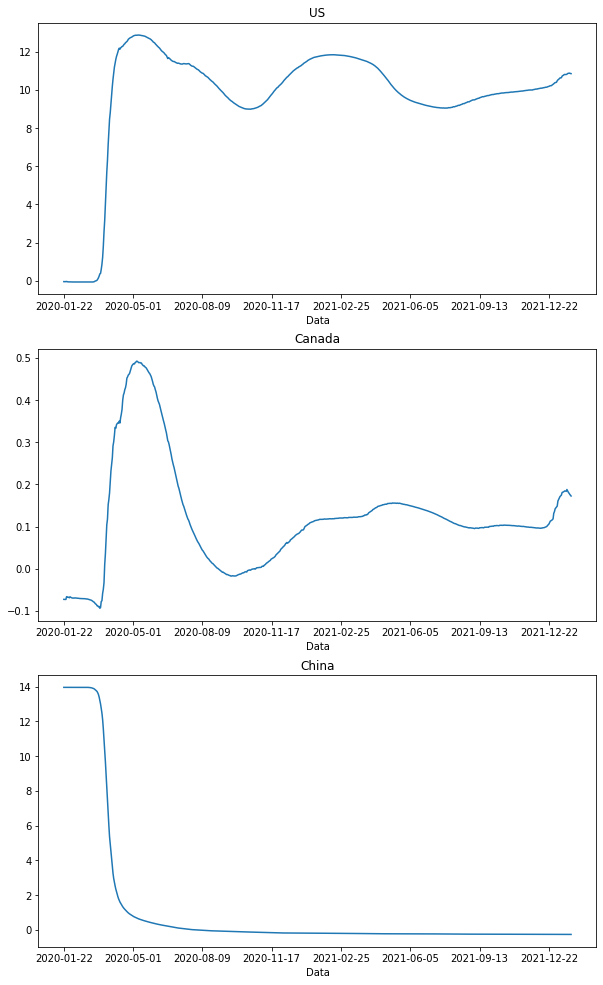

In [ ]:
#Part 1.2
Data_all = cases_raw
scaler = StandardScaler()
std_data = scaler.fit_transform(Data_all)
Countries = ['US', 'Canada', 'China']
Data_selected = []
plt.figure(figsize=(10, 17))

Dataframe = pd.DataFrame(std_data, columns = Data_all.columns, index = Data_all.index)#standardize the data
for ix, info in enumerate(Countries):
  temp_data = Dataframe.loc[info]
  Data_selected.append(temp_data)
  plt.subplot(3,1,ix+1)
  temp_data.plot()
  #plt.ylabel('')
  plt.xlabel('Data')
  plt.title(Countries[ix])

**PART 1.4 Discussion**

Since the data is now standardlized, the vertical axis is not the number of cases anymore. A positive derivative curve means this country suffers badly in covid and has more people getting sick compare to other countries. On the other hand, a downward curve means the country is doing better to prevent the spread of virus that time.

US and Canada did not have many patient at the begining of the outbreak while China started having Covid earlier than other countries. Latter the time, the situation goes better in China and Canada, yet the positive cases are still high in US. 


# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1) and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each component and a line to show cumulative --similar to tutorial. Limit x-axis if needed to better see the plot). **[0.25]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element). **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any differences in their trend? **[0.5]**

In [ ]:
#Part 2.1
#Data_cov1 = Dataframe.cov() #covariance matrix for the dataframe

n,m = std_data.shape
Data_cov = np.dot(std_data.T, std_data)/(n-1)

#print(Data_cov)
Data_cov.shape

(733, 733)

(196, 733)

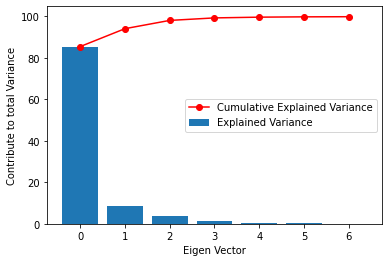

In [ ]:
#Part 2.2
from numpy import linalg as LA

def get_sorted_eigen(df_conv):
  w,v = LA.eigh(df_conv)
  args = (-w).argsort()#reverse the order
  w = w[args]
  v = v[:,args]
  return w,v #already sorted
#Part 2.3
Eigen_value, Eigen_vector = get_sorted_eigen(Data_cov)
eigValSum = sum(Eigen_value)
expVar = [ix/eigValSum*100 for ix in Eigen_value]
cumExpVar = np.cumsum(expVar)
plt.bar(range(7),expVar[:7], label='Explained Variance')
plt.plot(cumExpVar[:7],'r-o',label = 'Cumulative Explained Variance')
plt.xlabel('Eigen Vector')
plt.ylabel('Contribute to total Variance')
plt.legend()
plt.show()

In [ ]:
#Part 2.4
print('Top five PCs:', cumExpVar[:5])
print("With three PCs, they can cover 98% of dataset's variance")

Top five PCs: [85.47590445 94.10558679 98.08990311 99.30079148 99.65862424]
With three PCs, they can cover 98% of dataset's variance


In [ ]:
DF = pd.DataFrame(Eigen_vector, columns = range(1,734), index = Data_all.columns)

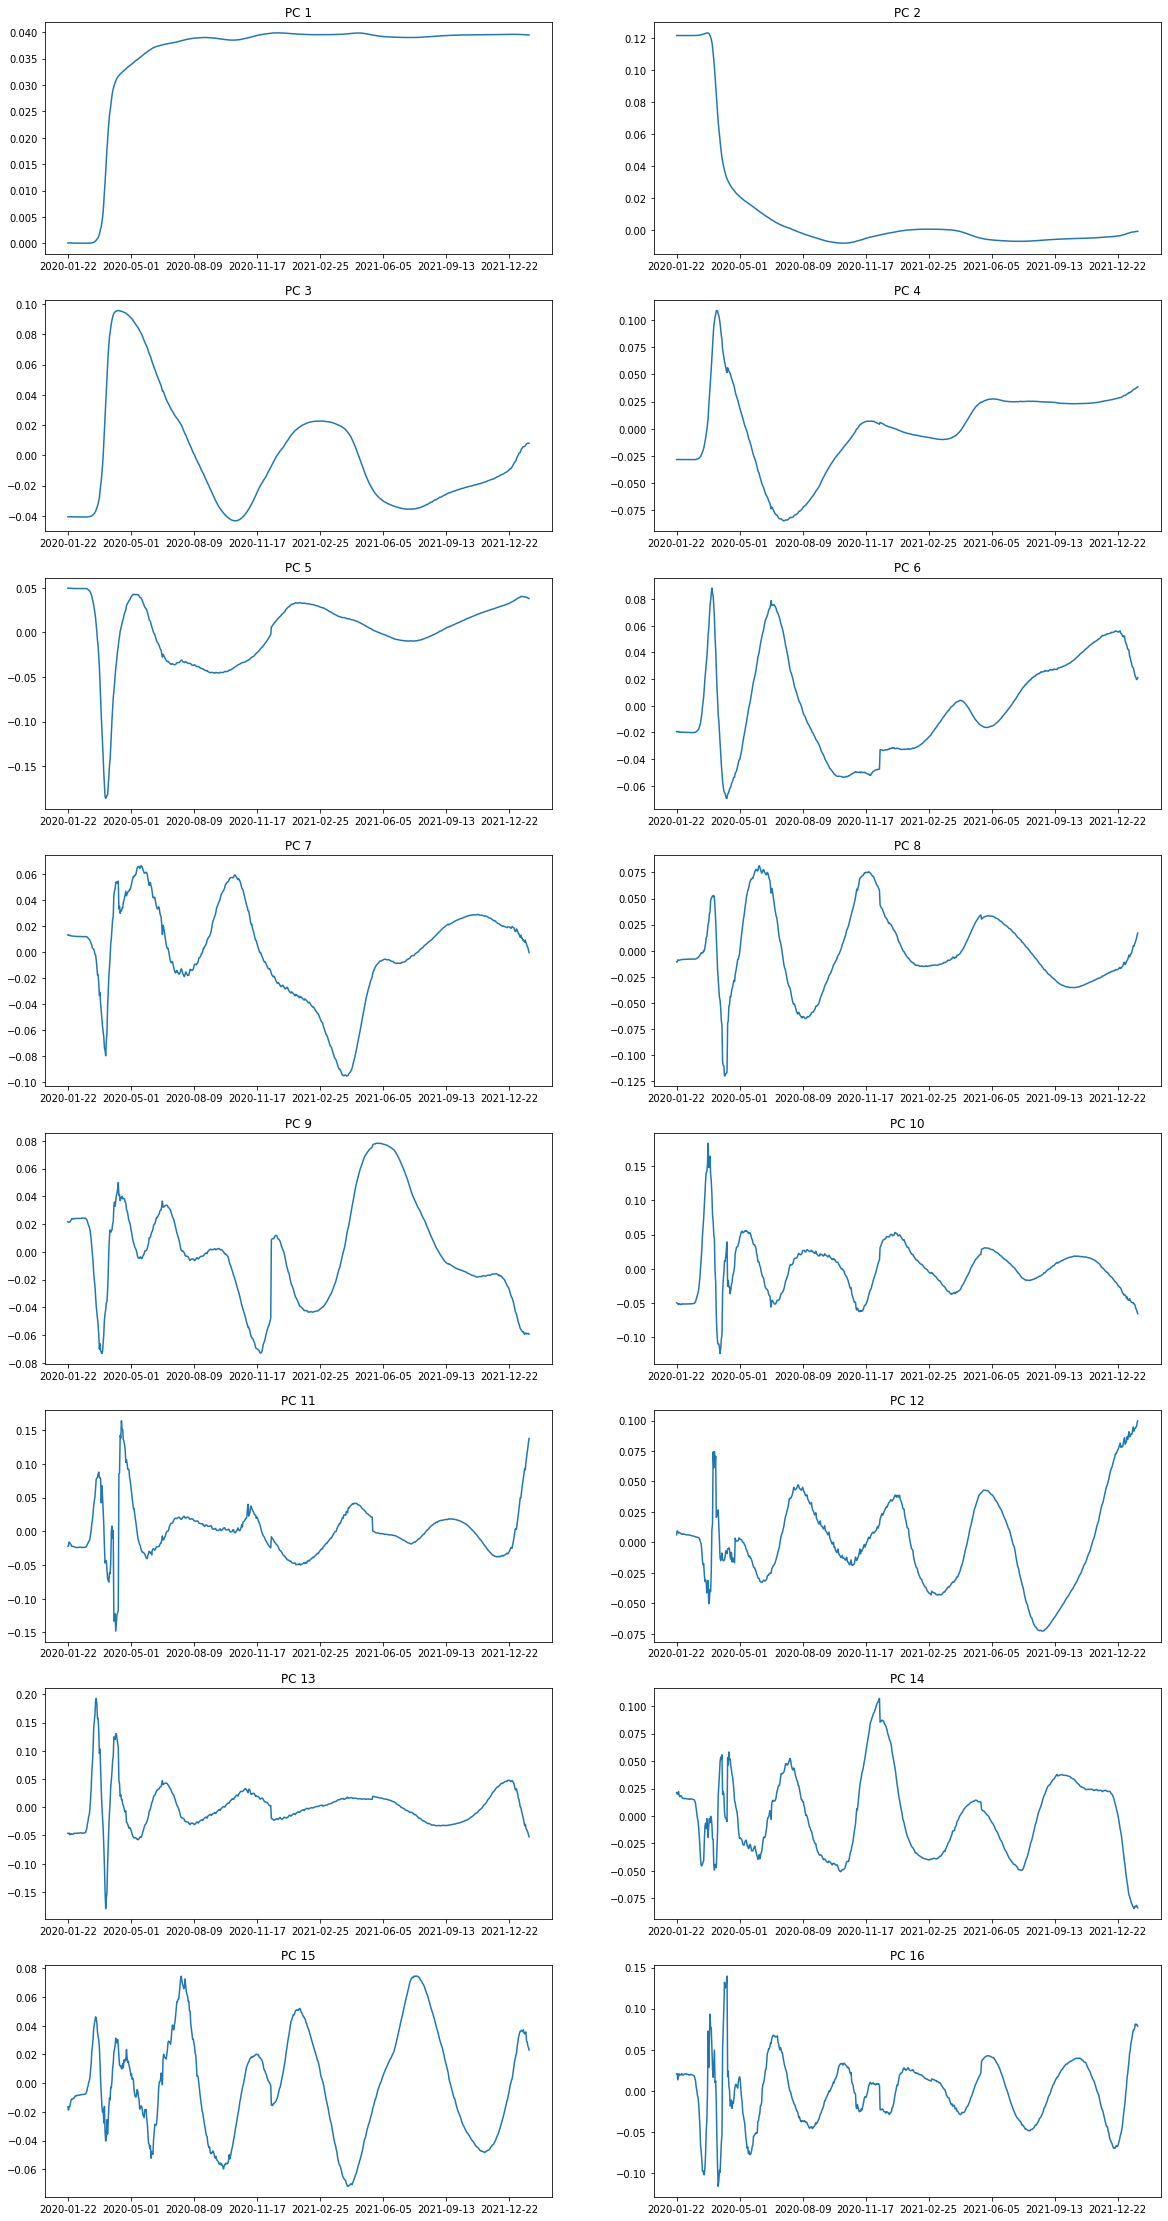

In [ ]:
#Part 2.5
#DF = pd.DataFrame(Eigen_vector, columns = Data_all.columns)
plt.figure(figsize=(20, 40))

for ix in range(0,16):
  plt.subplot(8,2,ix+1)
  temp = DF[ix+1]
  temp.plot()
  plt.title('PC {}'.format(ix+1))

**Part 2.6**

From the above plots, first few PCs have high value in vertical axis than rest of PCs which indicates the importance of first few PCs outweigh the rest.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[0.5]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**

In [ ]:
import warnings
import matplotlib.cbook
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

def plot_country_figures(original_df, country_name):
  print('Selected Country{}'.format(country_name))

  plt.figure(figsize=(15,7))
  temp = original_df.loc[country_name]
  temp.plot()
  plt.title('Original time-series for {}'.format(country_name))
  plt.ylabel('Number of Cases')

  plt.figure(figsize=(20,20))
  plt.subplot(6,2,1)
  temp = original_df.loc[country_name]
  temp.plot(label='Original')
  plt.legend()
  plt.title('All-in-one plot')
  plt.ylabel('Number of Cases')

  Scaler = StandardScaler()
  std_data = Scaler.fit_transform(original_df.values)
  DF = pd.DataFrame(std_data, columns = original_df.columns, index = original_df.index)

  options = [1, 2, 4, 8, 16]
  labels = ['PC1','PC1 and PC2', 'PC1 to PC4','PC1 to PC8','PC1 to PC16']
  
  Temp = []
  for c, ix in enumerate(options):
    plt.subplot(6,2,c+2)
    W_pc = Eigen_vector[:,0:ix]
    Proj_X = np.dot(std_data, W_pc)
    Recon_X = np.dot(Proj_X, W_pc.T)
    Back_X = scaler.inverse_transform(Recon_X)
    df = pd.DataFrame(Back_X, columns = original_df.columns, index = original_df.index)

    temp = df.loc[country_name]
    Temp.append(temp.values)
    temp.plot(label=labels[c])
    plt.legend()
    plt.title('{} PCs'.format(ix))
    plt.ylabel('Number of Cases')
    plt.subplot(6,2,1)
    temp.plot(label=labels[c])
    plt.legend()
    plt.ylabel('Number of Cases')

#Part 3.3   
  plt.figure()
  print('\nPC1 to PC16 should provide the best result')
  W_pc = Eigen_vector[:,0:16]
  Proj_X = np.dot(std_data, W_pc)
  Recon_X = np.dot(Proj_X, W_pc.T)
  scaler.fit(cases_raw.values)
  Back_X = scaler.inverse_transform(Recon_X)
  df_re = pd.DataFrame(Back_X, columns = original_df.columns, index = original_df.index)
  df = pd.DataFrame(original_df.loc[country_name])
  Resi_err = df.T - df_re
  Resi_err = Resi_err.dropna()
  Resi_err = Resi_err.T
  Resi_err.plot(figsize=(15,7))
  plt.title('Residue Error')

#Part 3.4
  RMSE = []
  for ix in range(1,101):
    std_data = Scaler.fit_transform(original_df.values)
    W_pc = Eigen_vector[:,0:ix]
    Proj_X = np.dot(std_data, W_pc)
    Recon_X = np.dot(Proj_X, W_pc.T)
    Back_X = scaler.inverse_transform(Recon_X)
    df_p = pd.DataFrame(Back_X, columns=cases_raw.columns, index=cases_raw.index)
    y = df_p.loc[country_name]
    target = original_df.loc[country_name]
    rmse= mean_squared_error(target,y, squared=False)
    RMSE.append(rmse)
  plt.figure(figsize=(15,7))
  plt.title('RMSE')
  plt.plot(RMSE)

Selected CountryUS

PC1 to PC16 should provide the best result


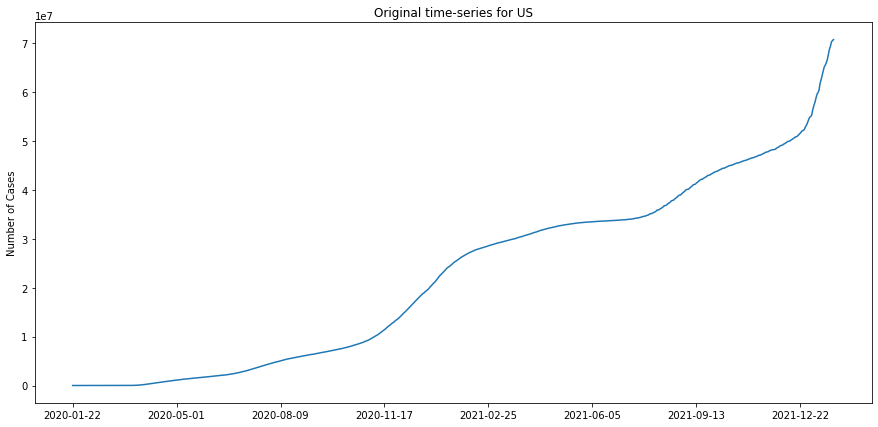

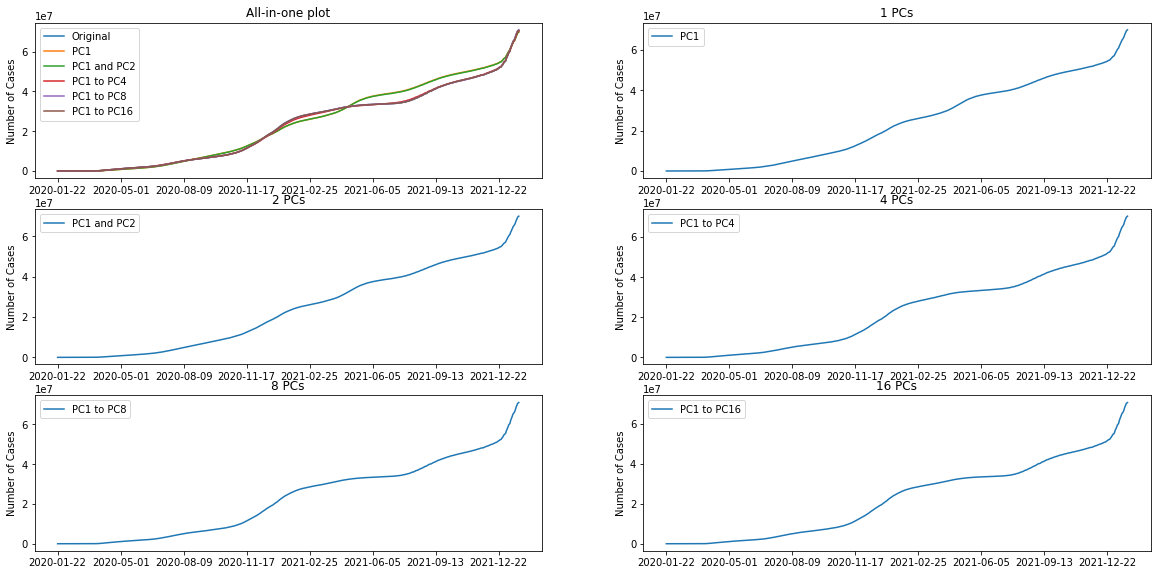

<Figure size 432x288 with 0 Axes>

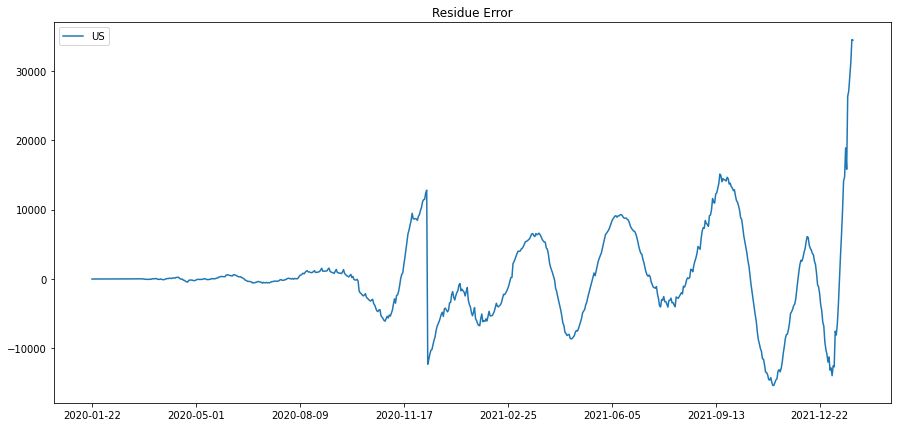

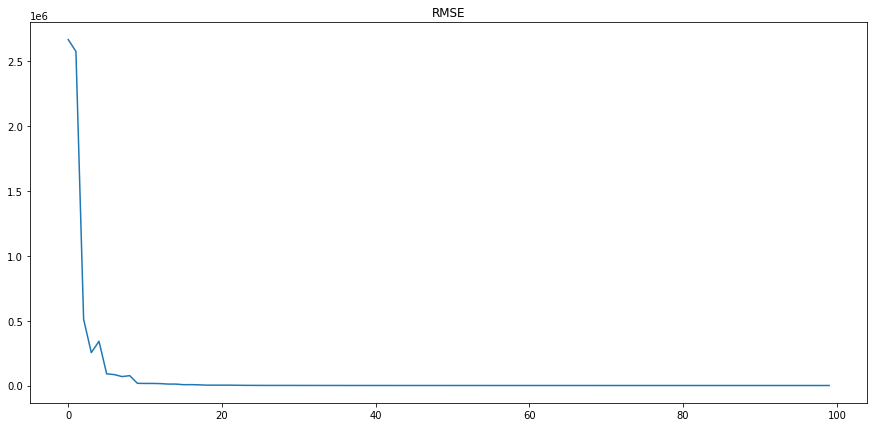

In [ ]:
plot_country_figures(cases_raw,'US')

Selected CountryCanada

PC1 to PC16 should provide the best result


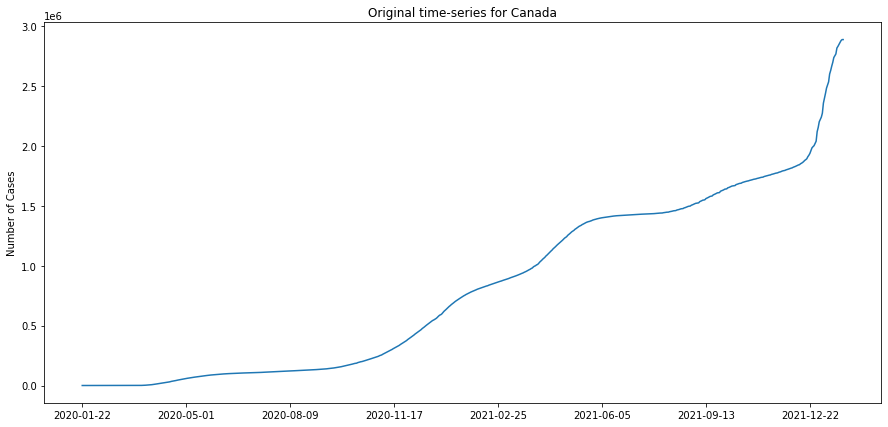

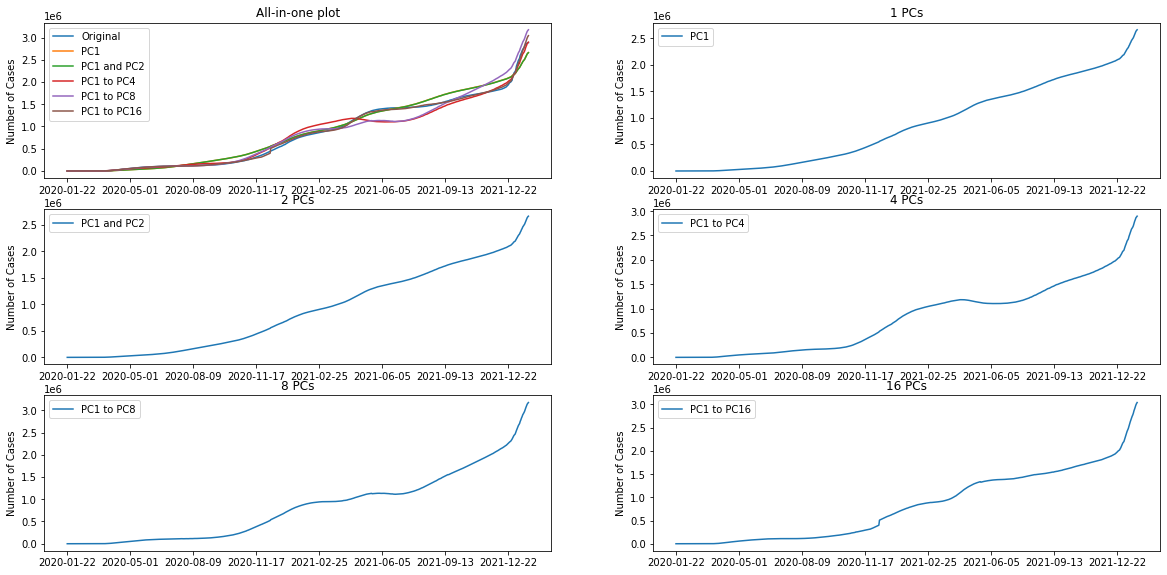

<Figure size 432x288 with 0 Axes>

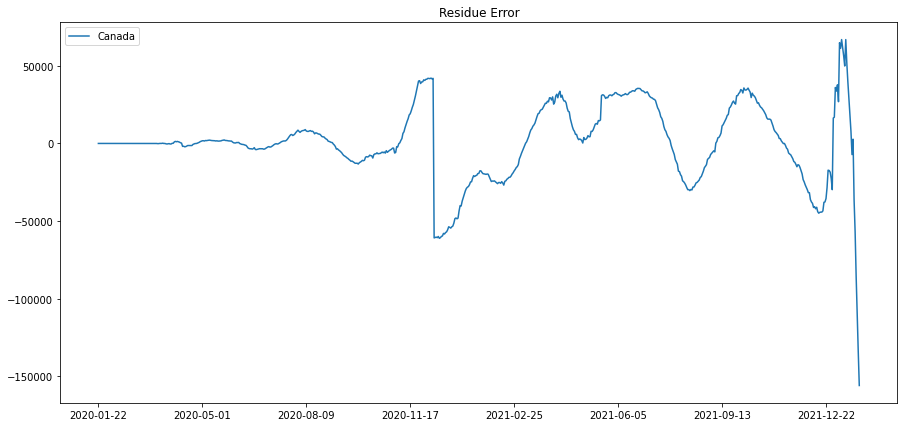

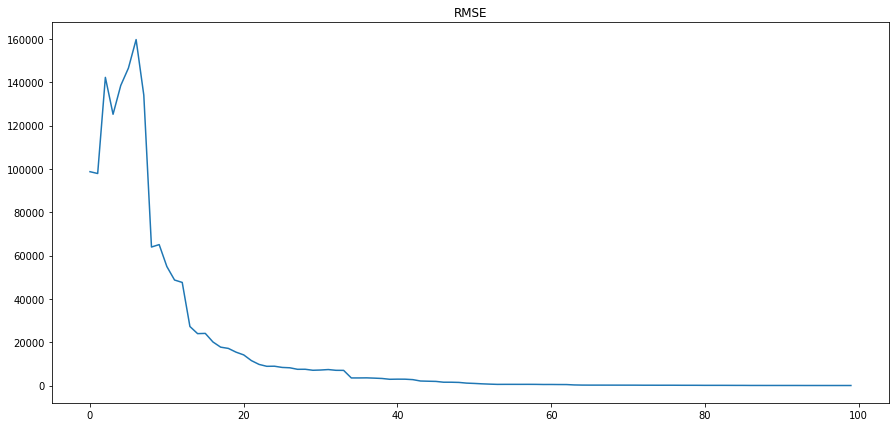

In [ ]:
plot_country_figures(cases_raw,'Canada')

Selected CountryChina

PC1 to PC16 should provide the best result


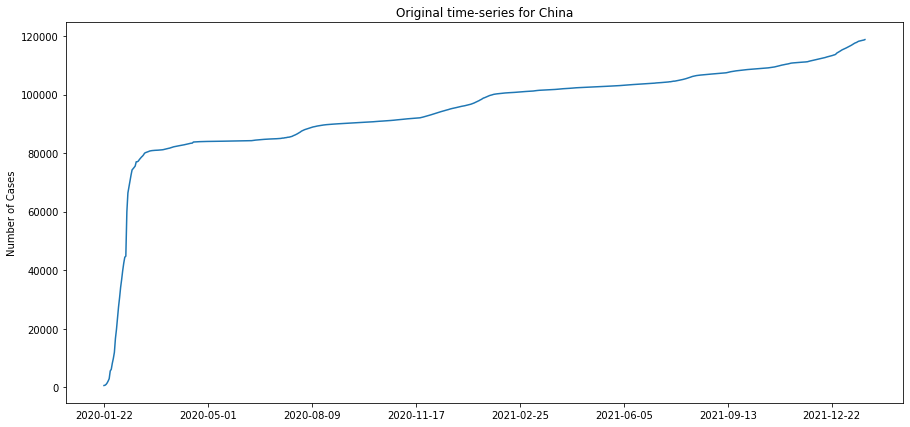

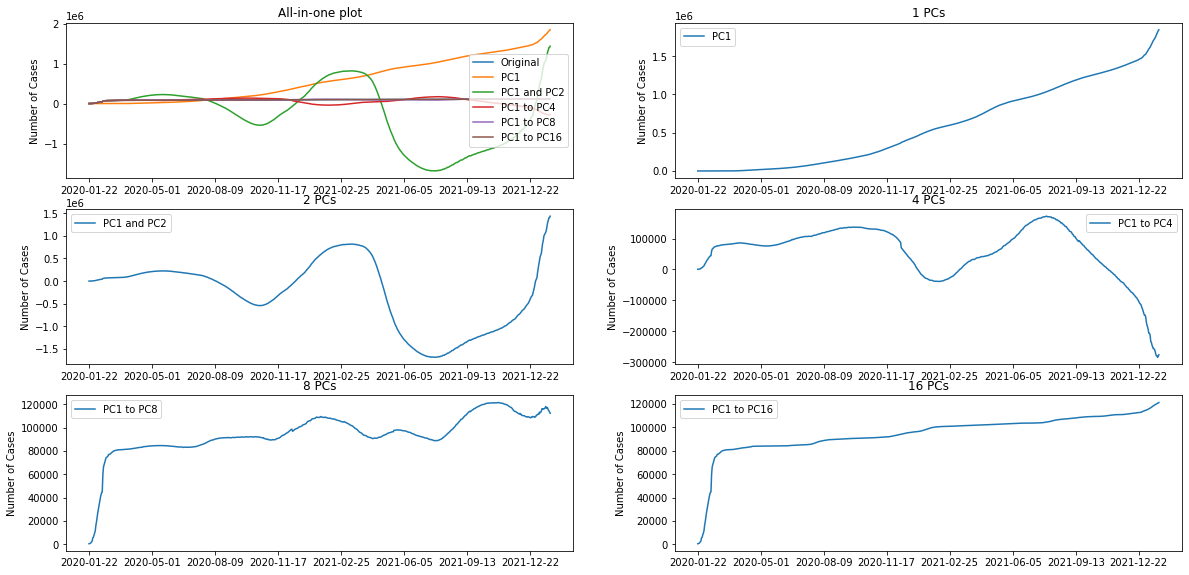

<Figure size 432x288 with 0 Axes>

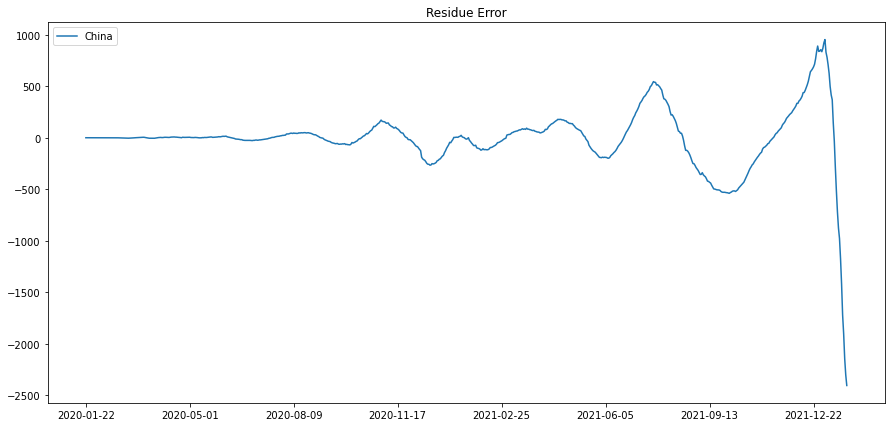

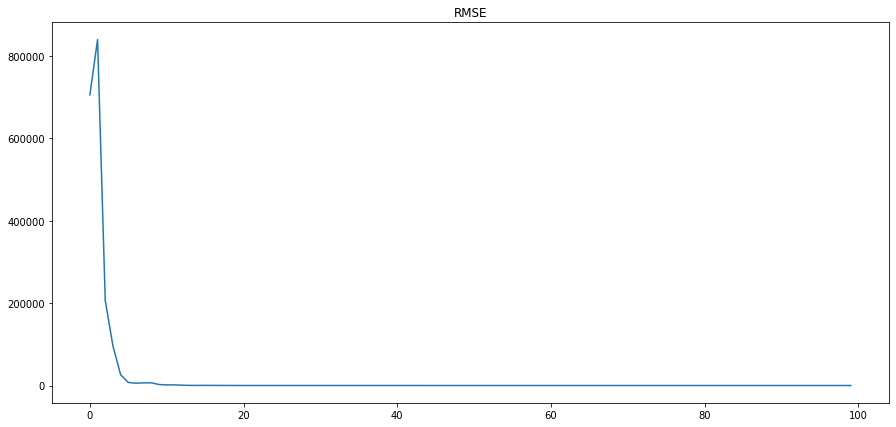

In [ ]:
plot_country_figures(cases_raw,'China')

# Part 4: SVD [2 Marks]
Modify your function in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[0.5]**

Explain if standardization or covariance computation is required for this part.**[0.5]**

Repeat part 3 and compare your PCA and SVD results. **[1]**



In [ ]:
#Part 4
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
def plot_svd_country_figures(original_df, country_name):
  print('Selected Country{}'.format(country_name))
  #Original plot
  plt.figure(figsize=(15,7))
  temp = original_df.loc[country_name]
  temp.plot()
  plt.title('Original time-series for {}'.format(country_name))
  plt.ylabel('Number of Cases')

  plt.figure(figsize=(20,20))
  plt.subplot(6,2,1)
  temp = original_df.loc[country_name]
  temp.plot(label='Original')
  plt.legend()
  plt.title('All-in-one plot')
  plt.ylabel('Number of Cases')

  Scaler = StandardScaler()
  std_data = Scaler.fit_transform(original_df.values)
  DF = pd.DataFrame(std_data, columns = original_df.columns, index = original_df.index)

  options = [1, 2, 4, 8, 16]
  labels = ['1 singular value','2 singular values', '4 singular values','8 singular values','16 singular values']
  
  Temp = []
  U,D,V = np.linalg.svd(std_data)

  for c, ix in enumerate(options):
    plt.subplot(6,2,c+2)
    #reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
    temp = np.matrix(U[:,:ix]) * np.diag(D[:ix])
    temp = temp * np.matrix(V[:ix, :])
    Back_X = scaler.inverse_transform(temp)
    df = pd.DataFrame(Back_X, columns = original_df.columns, index = original_df.index)

    temp = df.loc[country_name]
    Temp.append(temp.values)
    temp.plot(label=labels[c])
    plt.legend()
    plt.title('{} Singular Value(s)'.format(ix))
    plt.ylabel('Number of Cases')
    plt.subplot(6,2,1)
    temp.plot(label=labels[c])
    plt.legend()
    plt.ylabel('Number of Cases')

#Part 4.3   
  plt.figure()
  print('\n16 singular values should yield the best result')
  temp = np.matrix(U[:,:ix]) * np.diag(D[:ix])
  temp = temp * np.matrix(V[:ix, :])
  Back_X = scaler.inverse_transform(temp)
  df_re = pd.DataFrame(Back_X, columns = original_df.columns, index = original_df.index)
  df = pd.DataFrame(original_df.loc[country_name])
  Resi_err = df.T - df_re
  Resi_err = Resi_err.dropna()
  Resi_err = Resi_err.T
  Resi_err.plot(figsize=(15,7))
  plt.title('Residue Error for 16 singular values')

#Part 4.4
  RMSE = []
  for ix in range(1,101):
    std_data = Scaler.fit_transform(original_df.values)
    temp = np.matrix(U[:,:ix]) * np.diag(D[:ix])
    temp = temp * np.matrix(V[:ix, :])
    Back_X = scaler.inverse_transform(temp)
    df_p = pd.DataFrame(Back_X, columns=cases_raw.columns, index=cases_raw.index)
    y = df_p.loc[country_name]
    target = original_df.loc[country_name]
    rmse= mean_squared_error(target,y, squared=False)
    RMSE.append(rmse)
  plt.figure(figsize=(15,7))
  plt.title('RMSE')
  plt.plot(RMSE)


Selected CountryUS

16 singular values should yield the best result


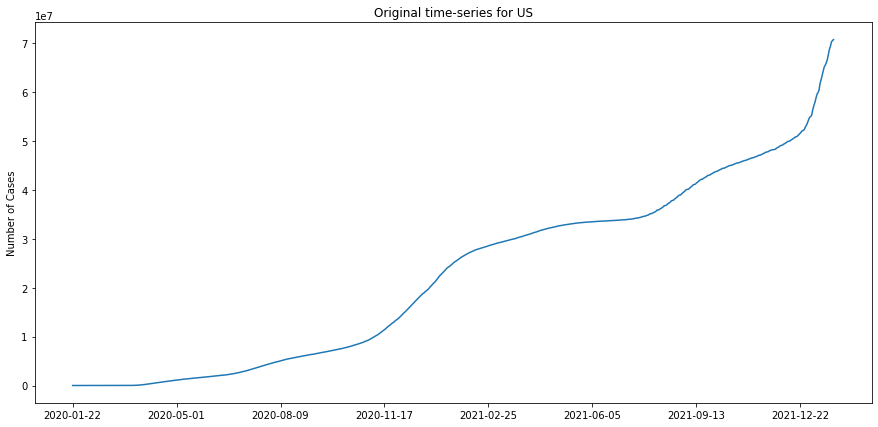

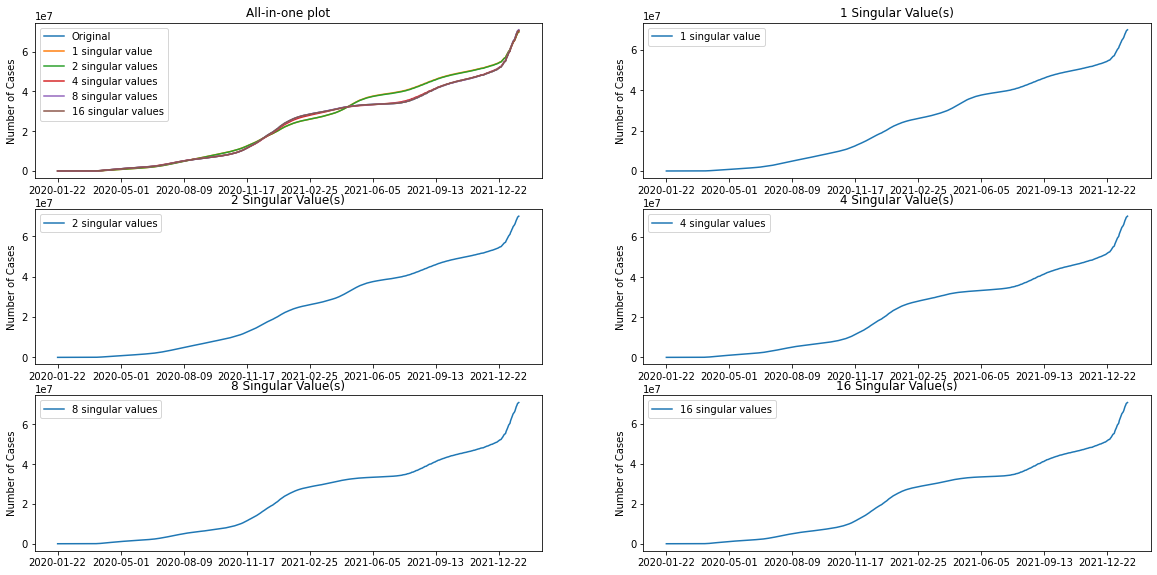

<Figure size 432x288 with 0 Axes>

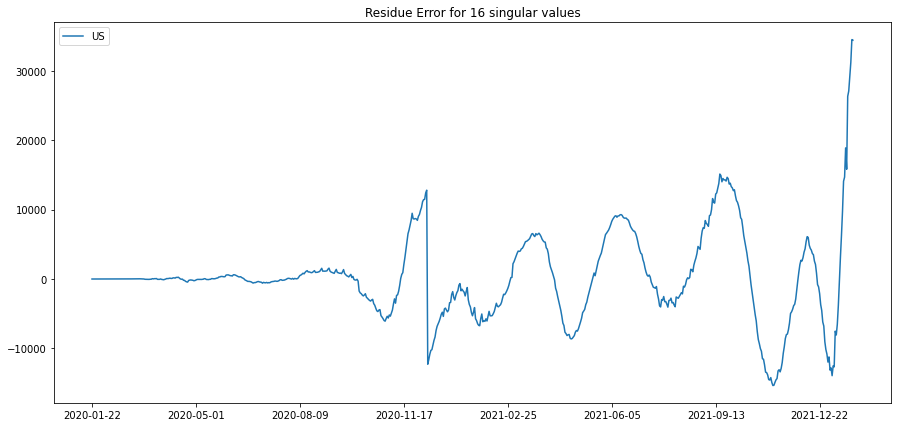

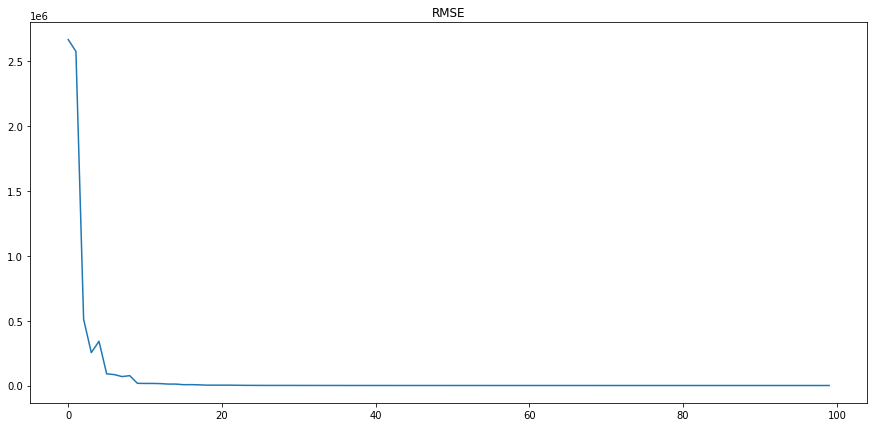

In [ ]:
 plot_svd_country_figures(cases_raw, 'US')

Selected CountryCanada

16 singular values should yield the best result


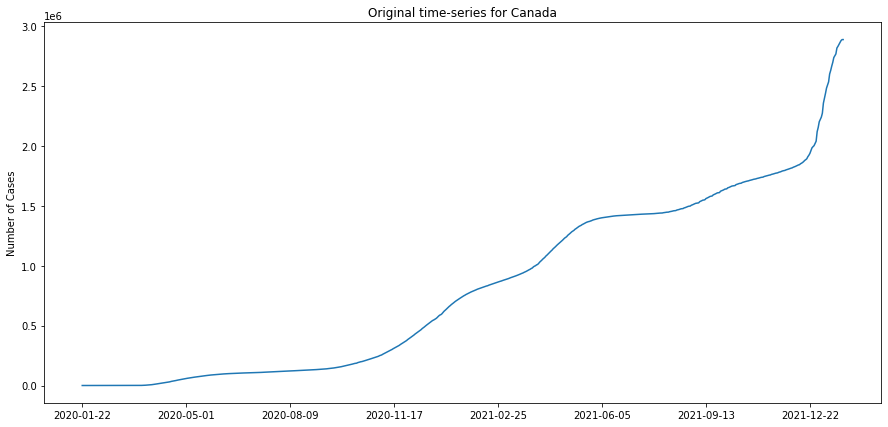

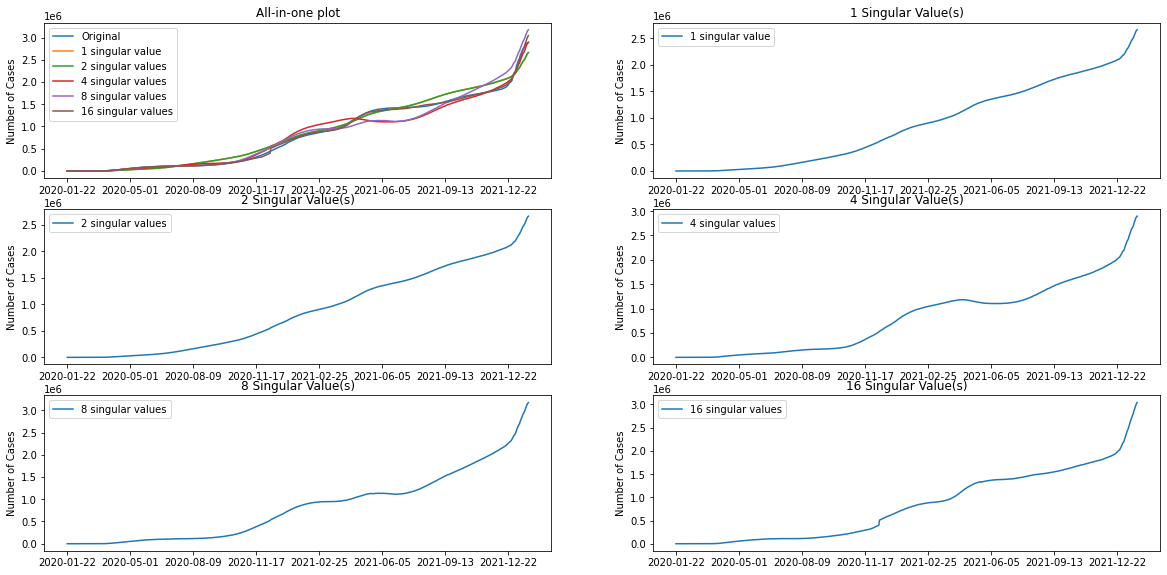

<Figure size 432x288 with 0 Axes>

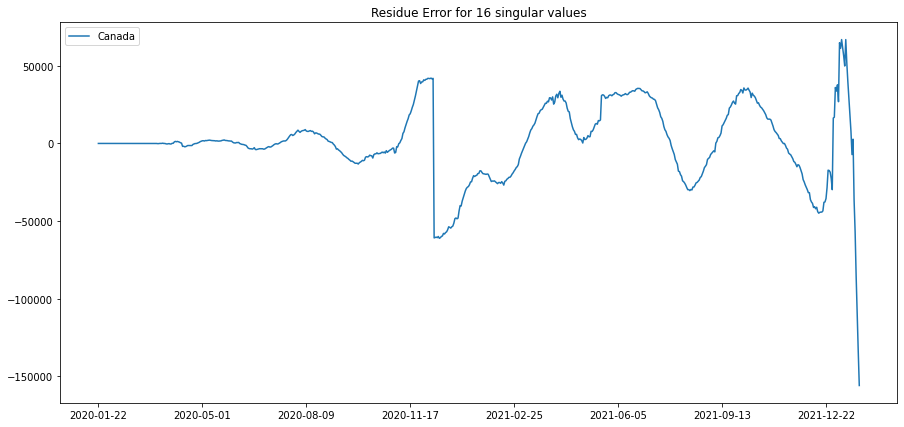

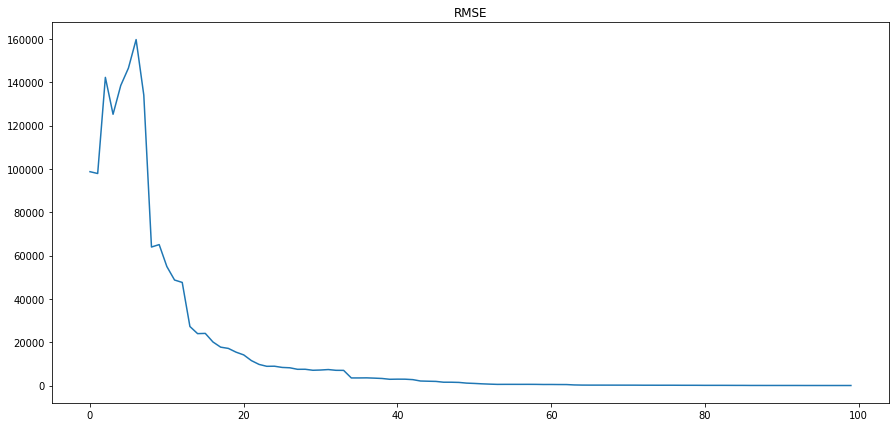

In [ ]:
 plot_svd_country_figures(cases_raw, 'Canada')

Selected CountryChina

16 singular values should yield the best result


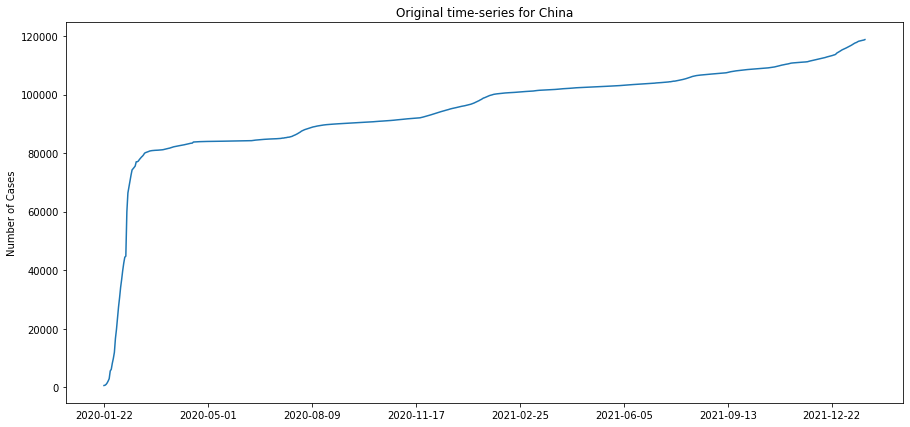

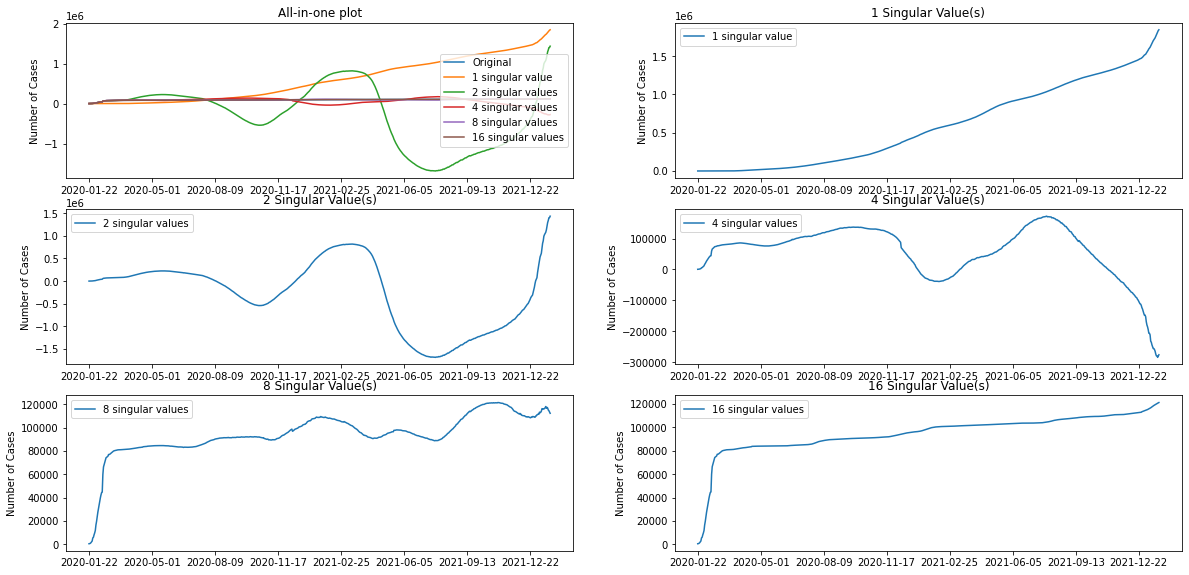

<Figure size 432x288 with 0 Axes>

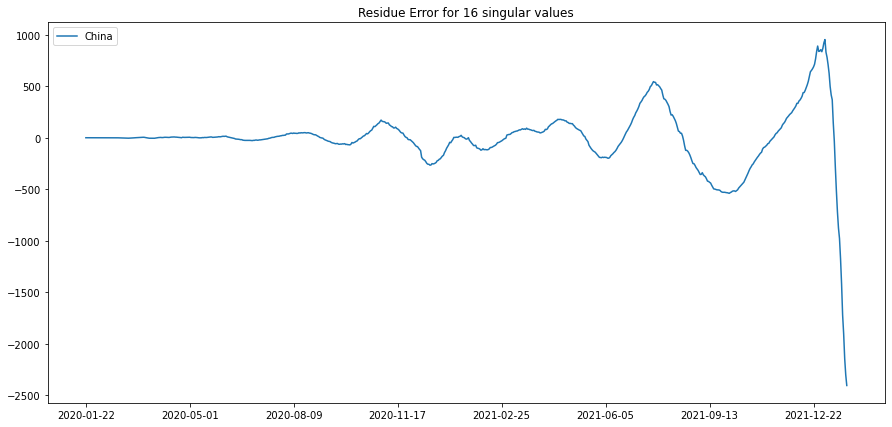

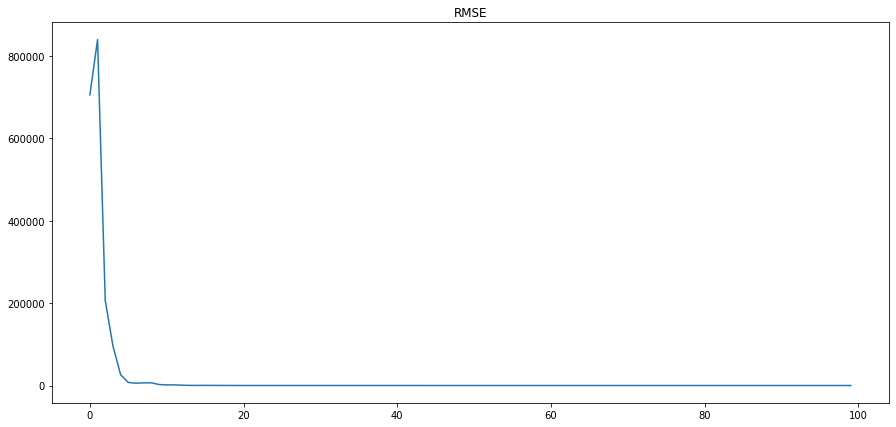

In [ ]:
 plot_svd_country_figures(cases_raw, 'China')

**Part 4 Discussion**

*Explain if standardization or covariance computation is required for this part.*

I think it is needed in SVD as different features may have various scale. It would be more accurate to train our model with standardlized data.


*Repeat part 3 and compare your PCA and SVD results. *
From the simulation result, both PCA and SVD perform equally well to this dataset especially when the number of components increase. 

# Part 5: Fashion-MNIST dataset [2 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. Why? **[0.25]**
* Compute Eigenvectors and Eigenvalues using SVD. **[0.25]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.25]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ principal components. **[0.5]**
* Run your function a few times and determine how many components are required so that we (humans!) can identify the items. **[0.25]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and they can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[0.5]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

(784, 784)


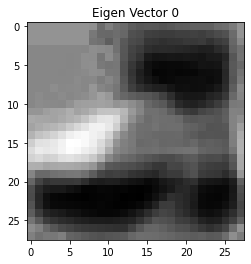

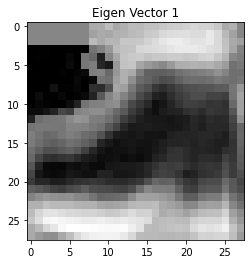

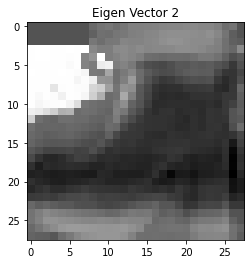

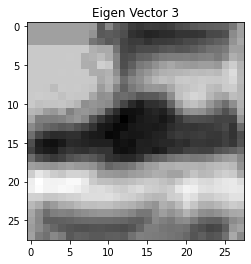

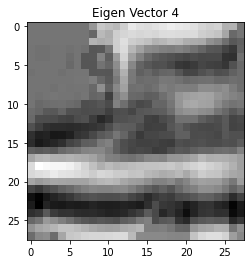

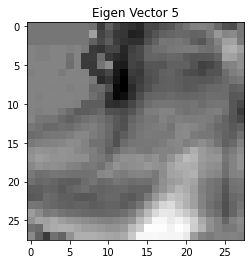

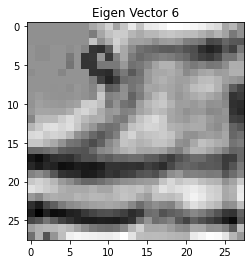

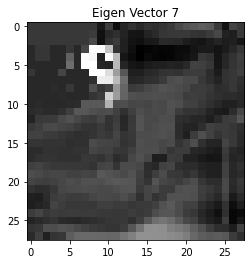

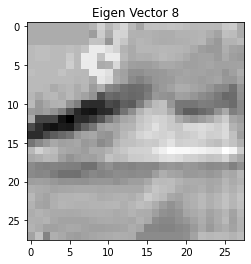

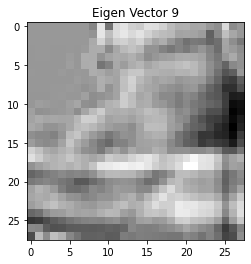

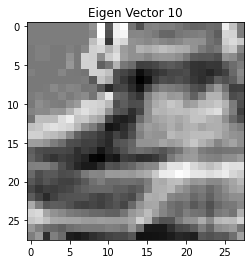

In [ ]:
#Part 5.1
y_df = pd.DataFrame(y)
selected_y = y_df.loc[y_df['class'].isin(['5', '7', '9'])] #Here I pick Sneaker, sandal and ankle boot as these three are very similar in shape

x_list = selected_y.index.values
selected_x = x.loc[x_list]

selected_y = selected_y.reset_index() #reset the index

scaler = StandardScaler()
std_X = scaler.fit_transform(selected_x.values)
U,D,V = np.linalg.svd(std_X)
selected_x = x.loc[x_list]
print(V.shape)


#Part 5.2 Compute Eigenvectors and Eigenvalues using SVD
Eigenvector = V # since covariance of A = A.T @ A / n-1, the eigenvector is the row in V
Eigenvalue = D**2 # eigenvalues are given by d**2 according to the numpy website
#pd.DataFrame(Eigenvector)


# 5.3Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? 
for ix in range(0,11):
  plt.gray()
  plt.imshow(V[ix,:].reshape(28,28)) 
  title = 'Eigen Vector {}'.format(ix)
  plt.title(title)
  plt.show() 

**Part 5.3**

From the above plots, similar to the plot in PCAs, first few plots can describe the feature of images better that the others since their eigenvectors are more important than the rest.

In [ ]:
import random
#Part 5.4
#Create a function that requires an argument  n  and plots a random image from the dataset, as well as a reconstruction with the first  n  principal components. [0.5]
#selected_x
#W_pc = Eigen_vector[:,0:ix]

xx = selected_x
temp = xx.to_numpy()

def svd_img (n):
  print('\nCompress with {} components'.format(n))
  scaler = StandardScaler()
  std_X = scaler.fit_transform(selected_x.values)
  Ev = V[:,0:n]
  proj_x = np.dot(std_X, Ev)
  recon_x = np.dot(proj_x, Ev.T)
  Back_X = scaler.inverse_transform(recon_x)
  #plt.imshow(Back_X.reshape(28,28),cmap = plt.cm.gray) 
  ix = random.randint(0,len(temp))
  print('Random picture is {}'.format(ix))
  plt.subplot(1,2,1)
  plt.imshow(temp[ix].reshape(28,28),cmap = plt.cm.gray)
  plt.title('Original Picture')
  plt.subplot(1,2,2)
  plt.imshow(Back_X[ix].reshape(28,28),cmap = plt.cm.gray)
  title = selected_y['class'][ix]
  plt.title('Reconstructed Label of {}'.format(title))
  plt.show()


Compress with 0 components
Random picture is 14


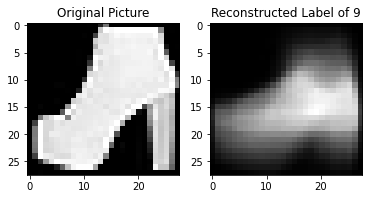


Compress with 10 components
Random picture is 126


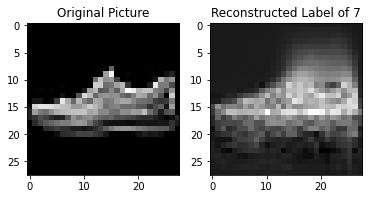


Compress with 20 components
Random picture is 245


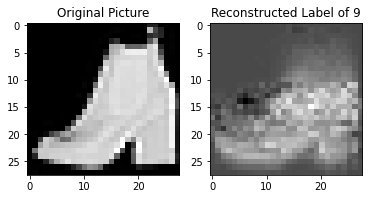


Compress with 30 components
Random picture is 182


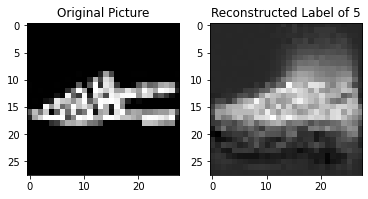


Compress with 40 components
Random picture is 310


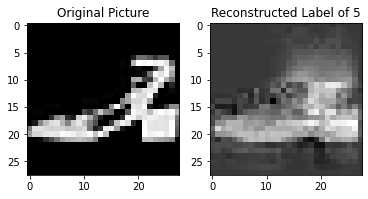


Compress with 50 components
Random picture is 305


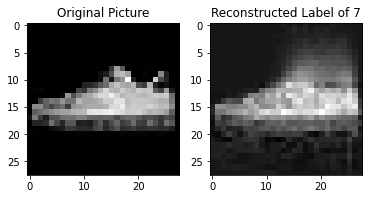


Compress with 60 components
Random picture is 215


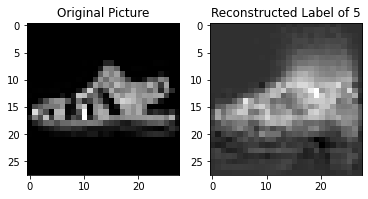


Compress with 70 components
Random picture is 174


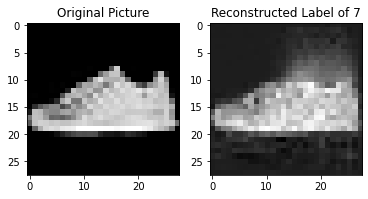


Compress with 80 components
Random picture is 116


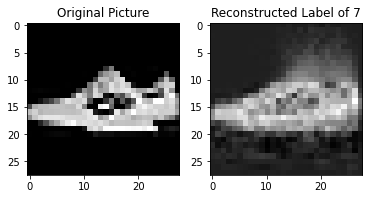


Compress with 90 components
Random picture is 168


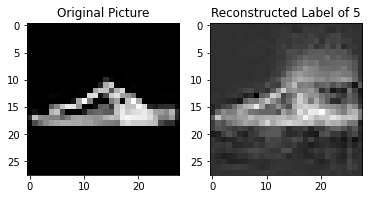


Compress with 100 components
Random picture is 186


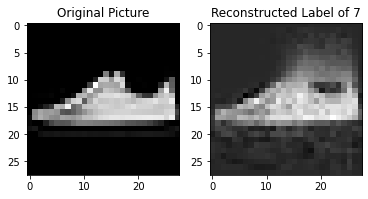


Compress with 110 components
Random picture is 21


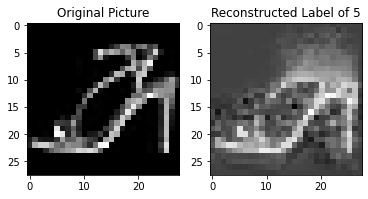


Compress with 120 components
Random picture is 129


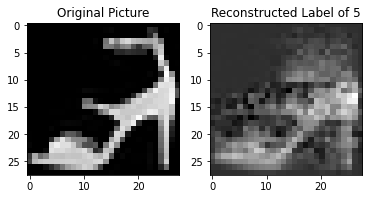


Compress with 130 components
Random picture is 86


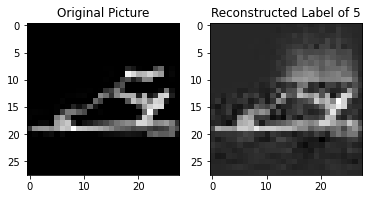


Compress with 140 components
Random picture is 66


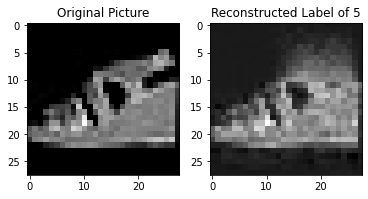

In [ ]:
for ix in range(0,150,10):
  svd_img(ix)

**Part 5.5**

From the above plots, some items are visual clear even with less than 20 components. Alas, for most of the items, object becomes visible when the number of components is greater than **60**. 

In [ ]:
#Part 5.6
# The model has 60 components
# PC_op => (784,60) = 62720
# X @ PC_op => Proj (1000,80) =80000
# PC
Compression_ratio = x.shape[0]*x.shape[1] / (1000*60 + 784*60)
print('The model can achieve {}x compression ratio using 60 components'.format(round(Compression_ratio,2)))

The model can achieve 7.32x compression ratio using 60 components


Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

